<a href="https://colab.research.google.com/github/jgkorman/Statistical-Analysis-In-Python/blob/main/Assignment_2_MLE2_Korman_JamesG_ICPSR_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment Notes**



*   For this assignment, you will conduct a parametric event history (survival) analysis utilizing UN
peacekeeping data, located on the Canvas site. If you are using Stata, you will need to stset the data prior to analysis.

*   For this assignment, you will examine whether type of war impacts the duration of UN peacekeeping missions.

* Utilize the following covariates (described below) in your analysis (choose only two of the three conflict types: civil, interst, and icw). Estimate a parametric survival model and defend your use
of the particular parametric model you have chosen. Choose a parameterization of the results
such as accelerated failure time or proportional hazards coefficients and interpret the results.

* Instructions: Proceed serially through the questions below. Type your answers to the following questions and include any relevant output (code and results), either in the text or attached at the end. If you include the output in the text, you will find that the output is easier to organize if you use a monospaced typeface, like it appears in your Stata and/or R consoles. That is why you will find instructions throughout the assignment encouraging you to use 10pt courier font. If you attach the output to the end, reference the relevant output. Be sure to discuss results at each stage, including any relevant statistics.

Questions:

1. In a few sentences, theorize the relationship between war type and peacekeeping mission duration.

2. Estimate a parametric survival model using the generalized gamma distribution and interpret the coefficient estimates.

3. Choose one monotonic distribution and one non-monotonic distribution and estimate additional parametric survival models and interpret the results. Report the results, along with the results from question #2, in a formatted table.

4. Of the three estimated models, identify the “best”-fitting model and justify your selection. Produce plots of the survival function and hazard rate based on your chosen model.

5. Explain the consequences of estimating a parametric survival model with an incorrect distribution.





# **Useful Links**

https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e

https://towardsdatascience.com/hands-on-survival-analysis-with-python-270fa1e6fb41

https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


import statsmodels.api as sm
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fname = "/content/drive/MyDrive/Delaware/ICPSR_2022/MLE 2/Assignments/Assignment 2/UNdata.dta"
df = pd.read_stata(fname)
df

,duration,failed,area,borders,civil,interst,icw
0,2.0,1.0,40000.0,1.0,0,0,1
1,4.0,1.0,10714.0,2.0,1,0,0
2,5.0,1.0,112517.0,4.0,0,0,1
3,5.0,1.0,42042.0,6.0,1,0,0
4,7.0,1.0,250000.0,2.0,0,0,1
5,7.0,1.0,NaN,1.0,0,1,0
6,7.0,1.0,6464.0,3.0,0,0,1
7,10.0,1.0,NaN,NaN,0,0,1
8,11.0,1.0,1025.0,8.0,0,0,1
9,12.0,1.0,NaN,4.0,1,0,0


# **Question 1** 

* **Question** In a few sentences, theorize the relationship between war type and peacekeeping mission duration.

* **Answer**: The relationship between war type and peacekeeping mission duration can be theorized as follows. Peacekeeping missions should generally be longer in instances of civil war due to lack of national unity and the risks that factions within society may erupt at any given moment relative to interstate war where 2 countries are fighting -- as most often the people in these countries rally around their flags and support their country in the given war-effort. 

# **Question 2 Paraemtric Survival Model**

* **Question**: Estimate a parametric survival model using the generalized gamma distribution and interpret the coefficient estimates.

In [ ]:
df = df.dropna()
df.head(5)

,duration,failed,area,borders,civil,interst,icw
0,2.0,1.0,40000.0,1.0,0,0,1
1,4.0,1.0,10714.0,2.0,1,0,0
2,5.0,1.0,112517.0,4.0,0,0,1
3,5.0,1.0,42042.0,6.0,1,0,0
4,7.0,1.0,250000.0,2.0,0,0,1


In [ ]:
# installing all packages and dependencies 
!pip install lifelines
from lifelines import GeneralizedGammaFitter
from lifelines import CoxPHFitter

In [ ]:
# building the 2 models 

ggf = GeneralizedGammaFitter()
ggf.fit(df['duration'], df['civil'], label='civil war')

ggf1 = GeneralizedGammaFitter()
ggf1.fit(df['duration'], df['interst'], label="inter state war")

<lifelines.GeneralizedGammaFitter:"inter state war", fitted with 43 total observations, 35 right-censored observations>

In [ ]:
ggf.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
mu_,3.004472,1.990403,-0.896647,6.905590,0.0,1.509479,0.131176,2.930420
ln_sigma_,0.786814,0.589531,-0.368645,1.942274,0.0,1.334645,0.181993,2.458049
lambda_,-4.098447,4.186677,-12.304183,4.107289,1.0,-1.217779,0.223308,2.162893


In [ ]:
ggf1.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
mu_,5.750989,0.717614,4.344491,7.157488,0.0,8.014040,1.110005e-15,49.678356
ln_sigma_,0.024790,0.513647,-0.981939,1.031520,0.0,0.048264,9.615062e-01,0.056632
lambda_,0.352533,1.402666,-2.396642,3.101709,1.0,-0.461597,6.443703e-01,0.634038


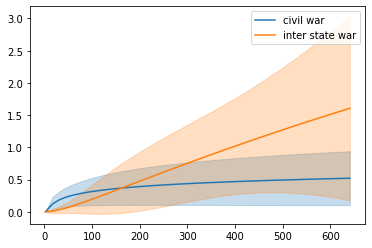

In [ ]:
# plotting the survival functions

g1 = ggf.plot()

ggf1.plot(ax=g1)


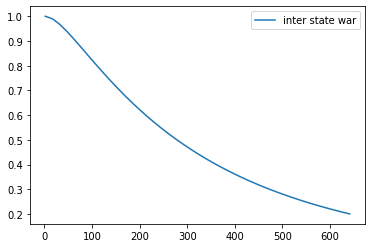

In [ ]:
ggf1.survival_function_.plot()




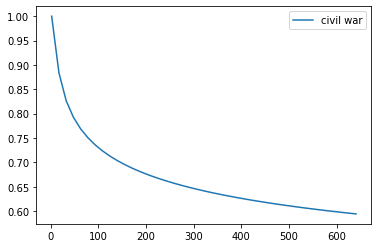

In [ ]:
ggf.survival_function_.plot()

## **Interpretation**:
* Overall, for the interpretation of our survival model, it appears as if the coefficients for interstate civil war -- purely on our baseline model, statistically significant, and this tells us that interstate war ulimtaely entails increased survival times for UN peacekeeping missiones relative to civil wars which entail decreased survival times. This is evident by the survival plots plotted above for both of them. 



# **Question 3 Sruvival models w/ and w/o monotonic distributions**

Choose one monotonic distribution and one non-monotonic distribution and estimate additional parametric survival models and interpret the results. Report the results, along with the results from question #2, in a formatted table.

In [ ]:
from lifelines import WeibullFitter
wb_inter = WeibullFitter()
wb_inter.fit(df['duration'], df['interst'], label='interstate war')


wb_civil = WeibullFitter()
wb_civil.fit(df['duration'], df['civil'], label='civil war')


<lifelines.WeibullFitter:"civil war", fitted with 43 total observations, 34 right-censored observations>

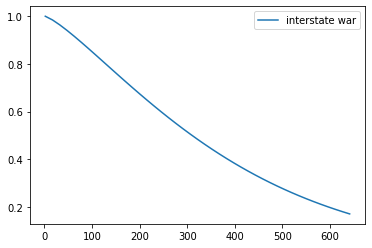

In [ ]:
wb_inter.survival_function_.plot()

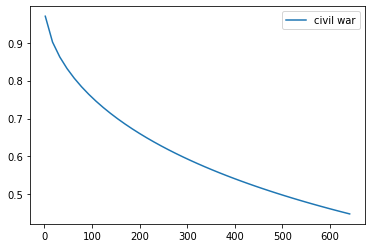

In [ ]:
wb_civil.survival_function_.plot()

In [ ]:
wb_inter.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,412.639066,117.208996,182.913656,642.364477,1.0,3.512009,0.000445,11.134774
rho_,1.285824,0.277480,0.741973,1.829674,1.0,1.030069,0.302977,1.722718


In [ ]:
wb_civil.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,945.466986,788.235494,-599.446193,2490.380165,1.0,1.198204,0.230838,2.115050
rho_,0.566403,0.149504,0.273380,0.859426,1.0,-2.900233,0.003729,8.067053


## **Model Interpretation**

* Overall, our survival analysis with a weibull distribution is showing similar results to the gamma distribution. In essence, what we have now is a situation where once again, civil war looks like it shows less duration of UN peacekeeping relative to interstate war. 



# **Question 4: The best model**

Of the three estimated models, identify the “best”-fitting model and justify your selection. Produce plots of the survival function and hazard rate based on your chosen model.



Of the three models, the parametric model where fit the weibell distribution was the best. This is so due to the flexiblity in fitting the distribution for a weibull model. However, for more flexibile models, we would want to estiamte a cox-ph model. The survival functions were plotted above. 

# **Question 5**

**Explain the consequences of estimating a parametric survival model with an incorrect distribution.**

**Answer**:

* One major consequence of estimating a parametric survival model with an incorrect distribution is to have a biased estimate of the mean survival. In that there is bias, will also lead our results over time to lack consistency based upon asymptotics. Overall, it's important to get the distribution correct, lest we risk an incorrect analysis.

